## Importando librerías

In [1]:
import pandas as pd
import numpy as np
import string
from nltk import word_tokenize
import re

In [2]:
import os

In [3]:
import networkx as nx

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import seaborn as sns

In [5]:
from collections import Counter

In [6]:
import spacy
nlp = spacy.load('es_core_news_sm')

In [7]:
import warnings
warnings.filterwarnings("ignore")

## Funciones

In [8]:
def delete_stopwords(text):
    """
    Función para eliminar stopwords del texto
    """
    doc = nlp(text)
    return ' '.join([word.text for word in doc if word.text not in esp_stop])

In [9]:
def cleaner(df, text):
    """
    Función para dejar las palabras en minúscula, eliminar números, puntuación, espacios y saltos de línea.
    """
    df[text] = df[text].str.lower()
    df[text] = df[text].apply(lambda x: re.sub("[0-9]", '', str(x)))
    df[text] = df[text].str.translate(str.maketrans(' ', ' ', string.punctuation))
    df[text] = df[text].str.replace('\n',' ')
    df[text] = df[text].str.strip()
    return df[text]

In [10]:
def wordcloud(data):
    """
    Función para graficar un wordcloud
    """
    wc = WordCloud(background_color='white',width=800, height=400, max_words=200, colormap = 'plasma').generate_from_frequencies(data)
    plt.figure(figsize=(15, 10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

## Desarrollo

In [11]:
from nltk.corpus import stopwords
esp_stop = stopwords.words('spanish')
esp_stop = esp_stop + ['ser','tener','deber']

## Llevando texto a dataframe

### Cargando markdowns

In [12]:
# Get the list of all files and directories
path = "Markdown/"
filelist = os.listdir(path)

In [13]:
filelist.sort()

In [14]:
filelist

['.ipynb_checkpoints',
 '00.md',
 '01.md',
 '02.md',
 '03.md',
 '04.md',
 '05.md',
 '06.md',
 '07.md',
 '08.md',
 '09.md',
 '10.md',
 '11.md',
 '12.md',
 '13.md']

In [15]:
df_constitucion = pd.DataFrame()
texto_total = ''

for file in filelist[1:]:
    with open(path+file, 'r', encoding = 'utf-8') as f:
        text = f.read()
        if text[-1:] != '\n':
            text = text+'\n'
    
    texto_total = texto_total + text

serie = texto_total.split('\n')

### Llevando a dataframe

In [16]:
df = pd.DataFrame({'texto':serie})

df['capitulo'] = np.where(df['texto'].str.contains('# Preámbulo'),df['texto'],np.nan)
df['capitulo'] = np.where(df['texto'].str.contains('# Disposiciones Transitorias'),df['texto'],df['capitulo'])
df['capitulo'] = np.where(df['texto'].str.contains('# Convención Constitucional'),df['texto'],df['capitulo'])
df['capitulo'] = np.where(df['texto'].str.contains('Capítulo'),df['texto'],df['capitulo'])

#Para asegurar que aparezca el capitulo IV
df['capitulo'] = np.where(df['texto'].str.contains('Capitulo'),df['texto'],df['capitulo'])
df['articulo'] = np.where(df['texto'].str.contains('### Artículo'),df['texto'],np.nan)
df['texto'] = np.where(df['texto']=='', np.nan, df['texto'])
df['texto'] = np.where(df['texto']==df['articulo'], np.nan, df['texto'])
df['texto'] = np.where(df['texto']==df['capitulo'], np.nan, df['texto'])
# Agregar numeral y ordinal


df['capitulo'].fillna(method='pad', inplace=True)
df['articulo'].fillna(method='pad', inplace=True)


In [17]:
df.dropna(subset = 'texto', inplace = True)

In [18]:
df['nro_capitulo'] = df['capitulo'].str.split(':', expand = True)[0]
df['nro_capitulo'] = df['nro_capitulo'].str.replace('# ','')
df['titulo_capitulo'] = df['capitulo'].str.split(':', expand = True)[1]
df['titulo_capitulo'] = df['titulo_capitulo'].str.strip()
df['articulo'] = df['articulo'].str.replace('### ','')

In [19]:
df['articulo'] = np.where(df['nro_capitulo']=='Convención Constitucional',np.nan,df['articulo'])

In [20]:
df

,texto,capitulo,articulo,nro_capitulo,titulo_capitulo
2,"Nosotras y nosotros, el pueblo de Chile, confo...",# Preámbulo,NaN,Preámbulo,None
7,1. Chile es un Estado social y democrático de ...,# Capítulo I: Principios y Disposiciones Gener...,Artículo 1,Capítulo I,Principios y Disposiciones Generales
8,2. Se constituye como una república solidaria....,# Capítulo I: Principios y Disposiciones Gener...,Artículo 1,Capítulo I,Principios y Disposiciones Generales
9,3. La protección y garantía de los derechos hu...,# Capítulo I: Principios y Disposiciones Gener...,Artículo 1,Capítulo I,Principios y Disposiciones Generales
13,"1. La soberanía reside en el pueblo de Chile, ...",# Capítulo I: Principios y Disposiciones Gener...,Artículo 2,Capítulo I,Principios y Disposiciones Generales
...,...,...,...,...,...
3188,Carolina Vilches Fuenzalida,# Convención Constitucional,NaN,Convención Constitucional,None
3190,Ingrid Villena Narbona,# Convención Constitucional,NaN,Convención Constitucional,None
3192,Manuel Woldarsky González,# Convención Constitucional,NaN,Convención Constitucional,None
3194,Camila Zárate Zárate,# Convención Constitucional,NaN,Convención Constitucional,None


In [21]:
df = df[['nro_capitulo','titulo_capitulo','articulo','texto']]
df.rename(columns = {'nro_capitulo':'capitulo'}, inplace = True)

In [22]:
df['q_palabras'] = df['texto'].apply(lambda x: len(x.split()))

<AxesSubplot:ylabel='q_palabras'>

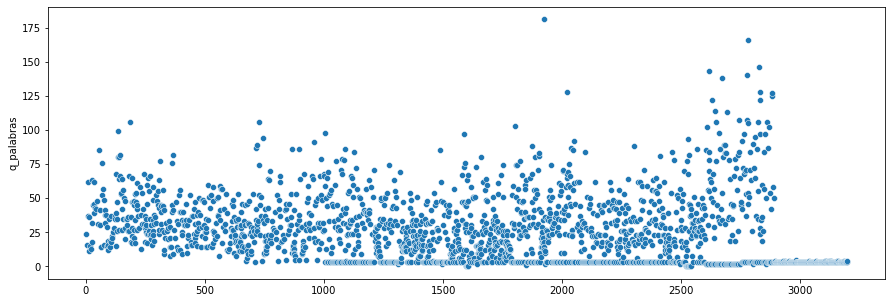

In [23]:
fig, ax = plt.subplots(1,1, figsize = (15,5))

sns.scatterplot(
    x = df.index,
    y = df['q_palabras'],
    data = df,
    ax = ax
)

In [26]:
df.titulo_capitulo.value_counts()

Derechos Fundamentales y Garantías            354
Estado Regional y Organización Territorial    296
Poder Legislativo                             221
Órganos Autónomos Constitucionales            172
Sistemas de Justicia                          163
Poder Ejecutivo                               142
Buen Gobierno y Función Pública                79
Naturaleza y Medioambiente                     66
Participación Democrática                      41
Principios y Disposiciones Generales           32
Reforma y Reemplazo de la Constitución         31
Name: titulo_capitulo, dtype: int64

In [25]:
df.groupby(['capitulo'])['q_palabras'].sum().reset_index()

,capitulo,q_palabras
0,Capitulo IV,1648
1,Capítulo I,1242
2,Capítulo II,11899
3,Capítulo III,1926
4,Capítulo IX,3817
5,Capítulo V,2402
6,Capítulo VI,6475
7,Capítulo VII,5663
8,Capítulo VIII,4859
9,Capítulo X,4391


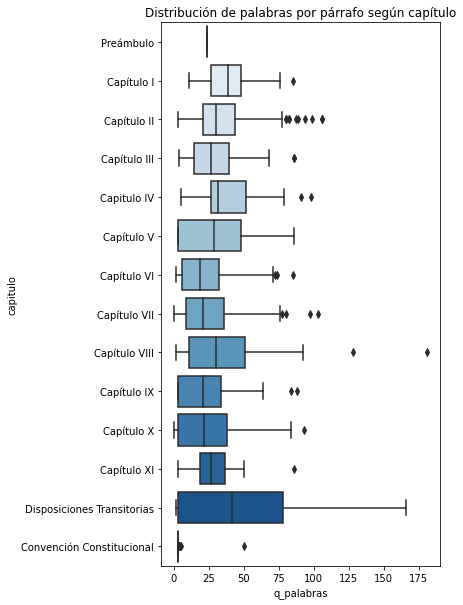

In [38]:
fig, ax = plt.subplots(1,1, figsize = (5,10))

sns.boxplot(
    data = df,
    y = 'capitulo',
    x = 'q_palabras',
    hue_order = [
        'Preámbulo',
        'Capítulo I',
        'Capítulo II',
        'Capítulo III',
        'Capitulo IV',
        'Capítulo V',
        'Capítulo VI',
        'Capítulo VII',
        'Capítulo VIII',
        'Capítulo IX',
        'Capítulo X',
        'Capítulo XI',
        'Disposiciones Transitorias',
        'Convención Constitucional'
                ],
    palette = 'Blues',
    ax = ax
)

plt.title('Distribución de palabras por párrafo según capítulo');

## Limpieza

In [39]:
df['texto'] = cleaner(df, 'texto')

In [40]:
df['q_palabras'] = df['texto'].apply(lambda x: len(x.split()))

<AxesSubplot:ylabel='q_palabras'>

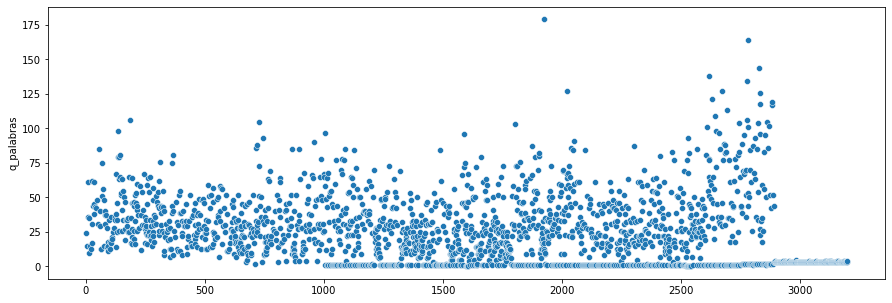

In [41]:
fig, ax = plt.subplots(1,1, figsize = (15,5))

sns.scatterplot(
    x = df.index,
    y = df['q_palabras'],
    data = df,
    ax = ax
)

<AxesSubplot:xlabel='q_palabras', ylabel='Density'>

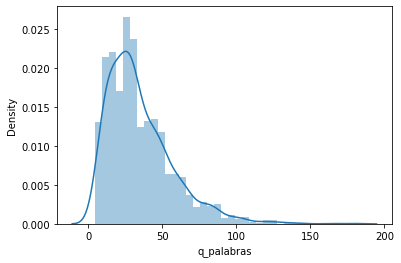

In [42]:
sns.distplot(df[df['q_palabras']>4]['q_palabras'])

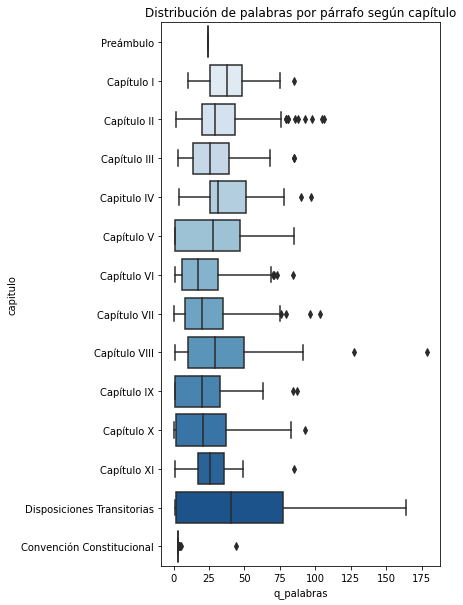

In [44]:
fig, ax = plt.subplots(1,1, figsize = (5,10))

sns.boxplot(
    data = df,
    y = 'capitulo',
    x = 'q_palabras',
    hue_order = [
        'Preámbulo',
        'Capítulo I',
        'Capítulo II',
        'Capítulo III',
        'Capitulo IV',
        'Capítulo V',
        'Capítulo VI',
        'Capítulo VII',
        'Capítulo VIII',
        'Capítulo IX',
        'Capítulo X',
        'Capítulo XI',
        'Disposiciones Transitorias',
        'Convención Constitucional'
                ],
    palette = 'Blues',
    ax = ax
)

plt.title('Distribución de palabras por párrafo según capítulo');

In [47]:
capitulos = list(df['capitulo'].value_counts().index)

In [52]:
capitulos

['Capítulo II',
 'Capítulo VI',
 'Capítulo VII',
 'Capítulo X',
 'Disposiciones Transitorias',
 'Capítulo IX',
 'Convención Constitucional',
 'Capítulo VIII',
 'Capítulo V',
 'Capítulo III',
 'Capitulo IV',
 'Capítulo I',
 'Capítulo XI',
 'Preámbulo']

In [73]:
df.groupby(['capitulo','titulo_capitulo'], dropna = False)['q_palabras'].sum()

capitulo                    titulo_capitulo                           
Capitulo IV                 Participación Democrática                      1610
Capítulo I                  Principios y Disposiciones Generales           1217
Capítulo II                 Derechos Fundamentales y Garantías            11575
Capítulo III                Naturaleza y Medioambiente                     1870
Capítulo IX                 Sistemas de Justicia                           3625
Capítulo V                  Buen Gobierno y Función Pública                2309
Capítulo VI                 Estado Regional y Organización Territorial     6144
Capítulo VII                Poder Legislativo                              5437
Capítulo VIII               Poder Ejecutivo                                4691
Capítulo X                  Órganos Autónomos Constitucionales             4210
Capítulo XI                 Reforma y Reemplazo de la Constitución          817
Convención Constitucional   NaN                  

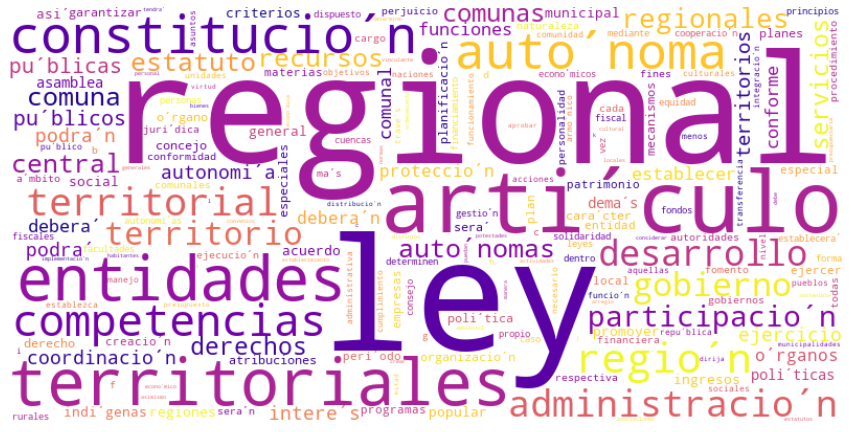

In [59]:
corpus_token = [word_tokenize(delete_stopwords(texto)) for texto in df[df['capitulo']==capitulos[1]].texto]

texto = []

for lista in corpus_token:
    for palabra in lista:
        texto.append(palabra)
        
dict_counter = Counter(texto)
wordcloud(dict_counter)

In [60]:
dict_counter.most_common(10)

[('ley', 70),
 ('regional', 66),
 ('artículo', 64),
 ('territoriales', 48),
 ('entidades', 43),
 ('constitución', 39),
 ('autónoma', 36),
 ('competencias', 35),
 ('región', 32),
 ('territorial', 27)]

### Bigramas

In [ ]:
corpus_token = [word_tokenize(delete_stopwords(texto)) for texto in df.texto]

texto_bigrama = []

for lista in corpus_token:
    for i, palabra in enumerate(lista):
        if i < len(lista)-1:
            texto_bigrama.append(lista[i] + ' ' + lista[i+1])
            
dict_counter = Counter(texto_bigrama)

In [ ]:
dict_counter.most_common(10)

### Trigramas

### Wordcloud con trigramas

In [61]:
corpus_token = [word_tokenize(texto) for texto in df.texto]

texto_trigrama = []

for lista in corpus_token:
    for i, palabra in enumerate(lista):
        if i < len(lista)-2:
            texto_trigrama.append(lista[i] + ' ' + lista[i+1] + ' ' + lista[i+2])
            
dict_counter = Counter(texto_trigrama)

In [62]:
tags = []

for i in list(dict_counter.keys()):
    doc = nlp(i)
    tag = [token.tag_ for token in doc]
    tags.append(tag)

In [63]:
grams = dict(zip(dict_counter.keys(), tags))

In [64]:
lista = []
for k, v in grams.items():
    if v == ['NOUN','ADP','NOUN']:
        lista.append(k)

In [65]:
dict_token = {}

for i in dict_counter.items():
    if i[0] in lista:
        dict_token.update({i[0]:i[1]})

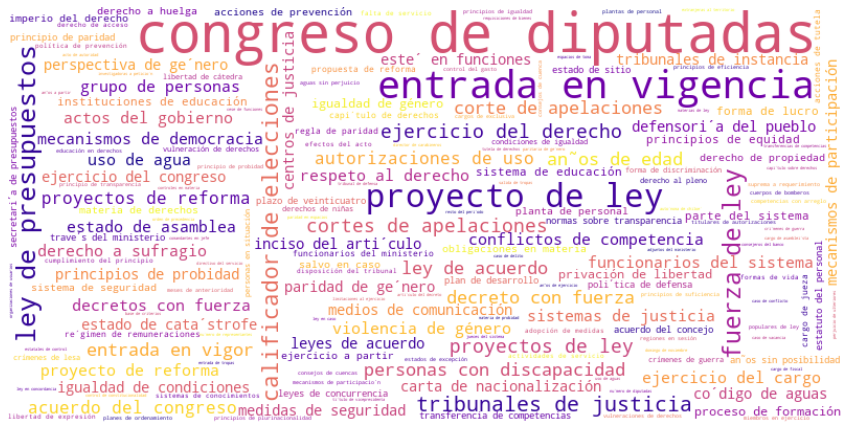

In [66]:
wordcloud(dict_token)

In [70]:
dict_counter.most_common()

[('de la república', 144),
 ('diputadas y diputados', 101),
 ('de diputadas y', 98),
 ('presidente de la', 98),
 ('congreso de diputadas', 87),
 ('la presidenta o', 83),
 ('de las regiones', 77),
 ('el presidente de', 69),
 ('la cámara de', 67),
 ('cámara de las', 64),
 ('el ejercicio de', 63),
 ('o el presidente', 57),
 ('y la ley', 53),
 ('presidenta o el', 53),
 ('de esta constitución', 53),
 ('de los derechos', 51),
 ('y diputados y', 47),
 ('las entidades territoriales', 45),
 ('la constitución y', 45),
 ('toda persona tiene', 43),
 ('la entrada en', 43),
 ('persona tiene derecho', 42),
 ('el congreso de', 42),
 ('tiene derecho a', 41),
 ('sin perjuicio de', 39),
 ('derecho a la', 38),
 ('constitución y la', 38),
 ('entrada en vigencia', 38),
 ('pueblos y naciones', 37),
 ('establezca la ley', 37),
 ('sistema nacional de', 37),
 ('en vigencia de', 37),
 ('que establezca la', 35),
 ('vigencia de esta', 34),
 ('es deber del', 32),
 ('de las personas', 32),
 ('de la naturaleza'